<a href="https://colab.research.google.com/github/RamNarayan22/BackendRep/blob/main/Telco_Customer_Churn_through_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('Churn.csv')

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df=df.drop('customerID',axis='columns')

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
df1 = df[df.TotalCharges!=" "]

In [ ]:

pd.to_numeric(df1.TotalCharges)

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

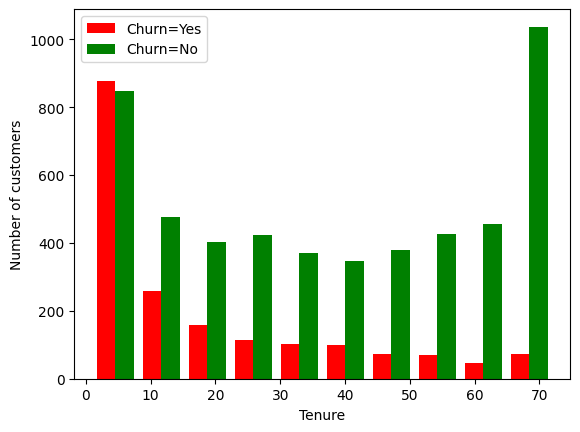

In [ ]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],)
plt.legend(['Churn=Yes','Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.show()

In [ ]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [ ]:
df1=df1.replace('No internet service','No')
df1=df1.replace('No phone service','No')

In [ ]:
print_unique_col_values(df1)
#

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [ ]:
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)


<ipython-input-17-190172891>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-17-190172891>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [ ]:
for colu in df1:
    print(f'{col}: {df1[col].unique()}')

Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female' :0, 'Male' : 1})

<ipython-input-21-4215112607>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female' :0, 'Male' : 1})


,gender
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [ ]:
df2 = pd.get_dummies(data = df1, columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
cols_to_scale= ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
 x=df2.drop('Churn',axis='columns')
 y=df2['Churn']

In [ ]:

import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
#Nueral Network

In [ ]:
model =keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation = 'relu'),

    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid'),
])
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Invalid dtype: object

In [ ]:
x_train.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,float64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64
